<a href="https://colab.research.google.com/github/10KimJunGu/pythonadv/blob/main/8_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 실습에 사용할 데이터 셋

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [10]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
df_iris = pd.DataFrame(data, columns = feature_names)

In [12]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
df_iris['target'] = target # target데이터를 옆에다가 붙여보기

In [16]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 2. 시각화

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


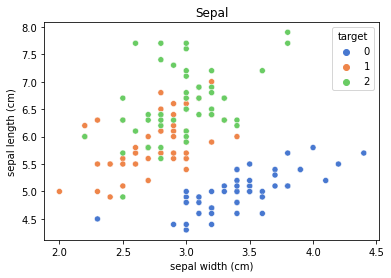

In [19]:
sns.scatterplot('sepal width (cm)', 'sepal length (cm)', hue='target', palette='muted', data=df_iris)
# sepel width : x값의 제목
# sepal length : y값의 제목
# hue='target' : 데이터가 실제로 쓰이는 컬럼은 target (target을 분류하겠다)
# palette : 색상결정
plt.title('Sepal')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


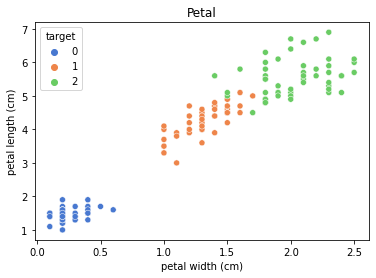

In [20]:
sns.scatterplot('petal width (cm)', 'petal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Petal')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


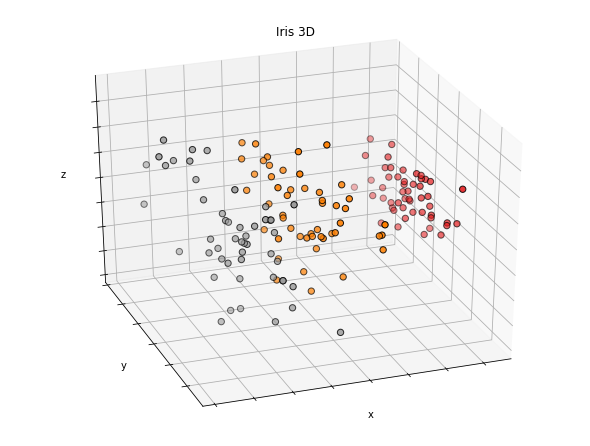

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# 몰라도 되고 이런게 있구나라고 보면된다

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'], cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title('Iris 3D')
ax.set_xlabel('x')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('y')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('z')
ax.w_zaxis.set_ticklabels([])
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'], stratify=df_iris['target'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [37]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [38]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


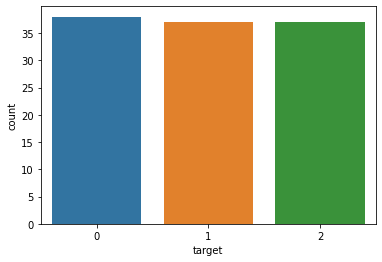

In [39]:
sns.countplot(y_train)

# 3. Logistic Regression

* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)
* 로지스틱 회귀: 영구의 통계학자인 D.R. Cox가 1958년에 제안한 확률 모델
* 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법
* 로지스틱 회귀, 서포트 벡터 머신과 같은 알고리즘은 이진 분류만 가능(2개의 클래스 판별만 가능)
  * 3개 이상의 클래스에 대한 판별을 진행하는 경우 아래와 같은 전략으로 판별
    * one-vs-rest(OvR):  K개의 클래스가 존재할 때, 1개의 클래스를 제외한 다른 클래스를 K개 만들어, 각각의 이진 분류에 대한 확률을 구하고, 총합을 통해 최종 클래스를 판별
    * one-vs-one(OvO): 4개의 계정을 구분하는 클래스가 존재한다고 할 때, Ovs1, Ovs2, Ovs3, .., 2vs3 까지의 NX(N-1)/2 개의 분류기를 만들어 가장 많이 양성으로 선택된 클래스를 판별

> 대부분 OvsR 전략을 선호

* Linear Regression : 직선을 그어주는(예측 선을 그어주는 회귀)
* Logistic Regression : 분류에 쓰이는 회귀

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression()

In [42]:
model.fit(x_train, y_train)

LogisticRegression()

In [43]:
prediction = model.predict(x_valid)

In [44]:
prediction[:5]

array([2, 2, 2, 1, 2])

In [45]:
(prediction == y_valid).mean() # 모델에 대한 평가

0.9736842105263158

# 4. SGDClassifier : 확률적 경사하강법

* stochastic gradient descent(SGD): 확률적 경사 하강법
* [sklearn 문서](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
* 전체 데이터가 아닌 랜덤하게 추출한 일부 데이터 한개에 대해서 그래디언트를 계산하고 경사 하강 알고리즘을 적용하는 방법
* 학습 중간 과정에서 결과의 진폭이 크고 불안정하지만 속도가 매우 빠름

In [34]:
from IPython.display import Image

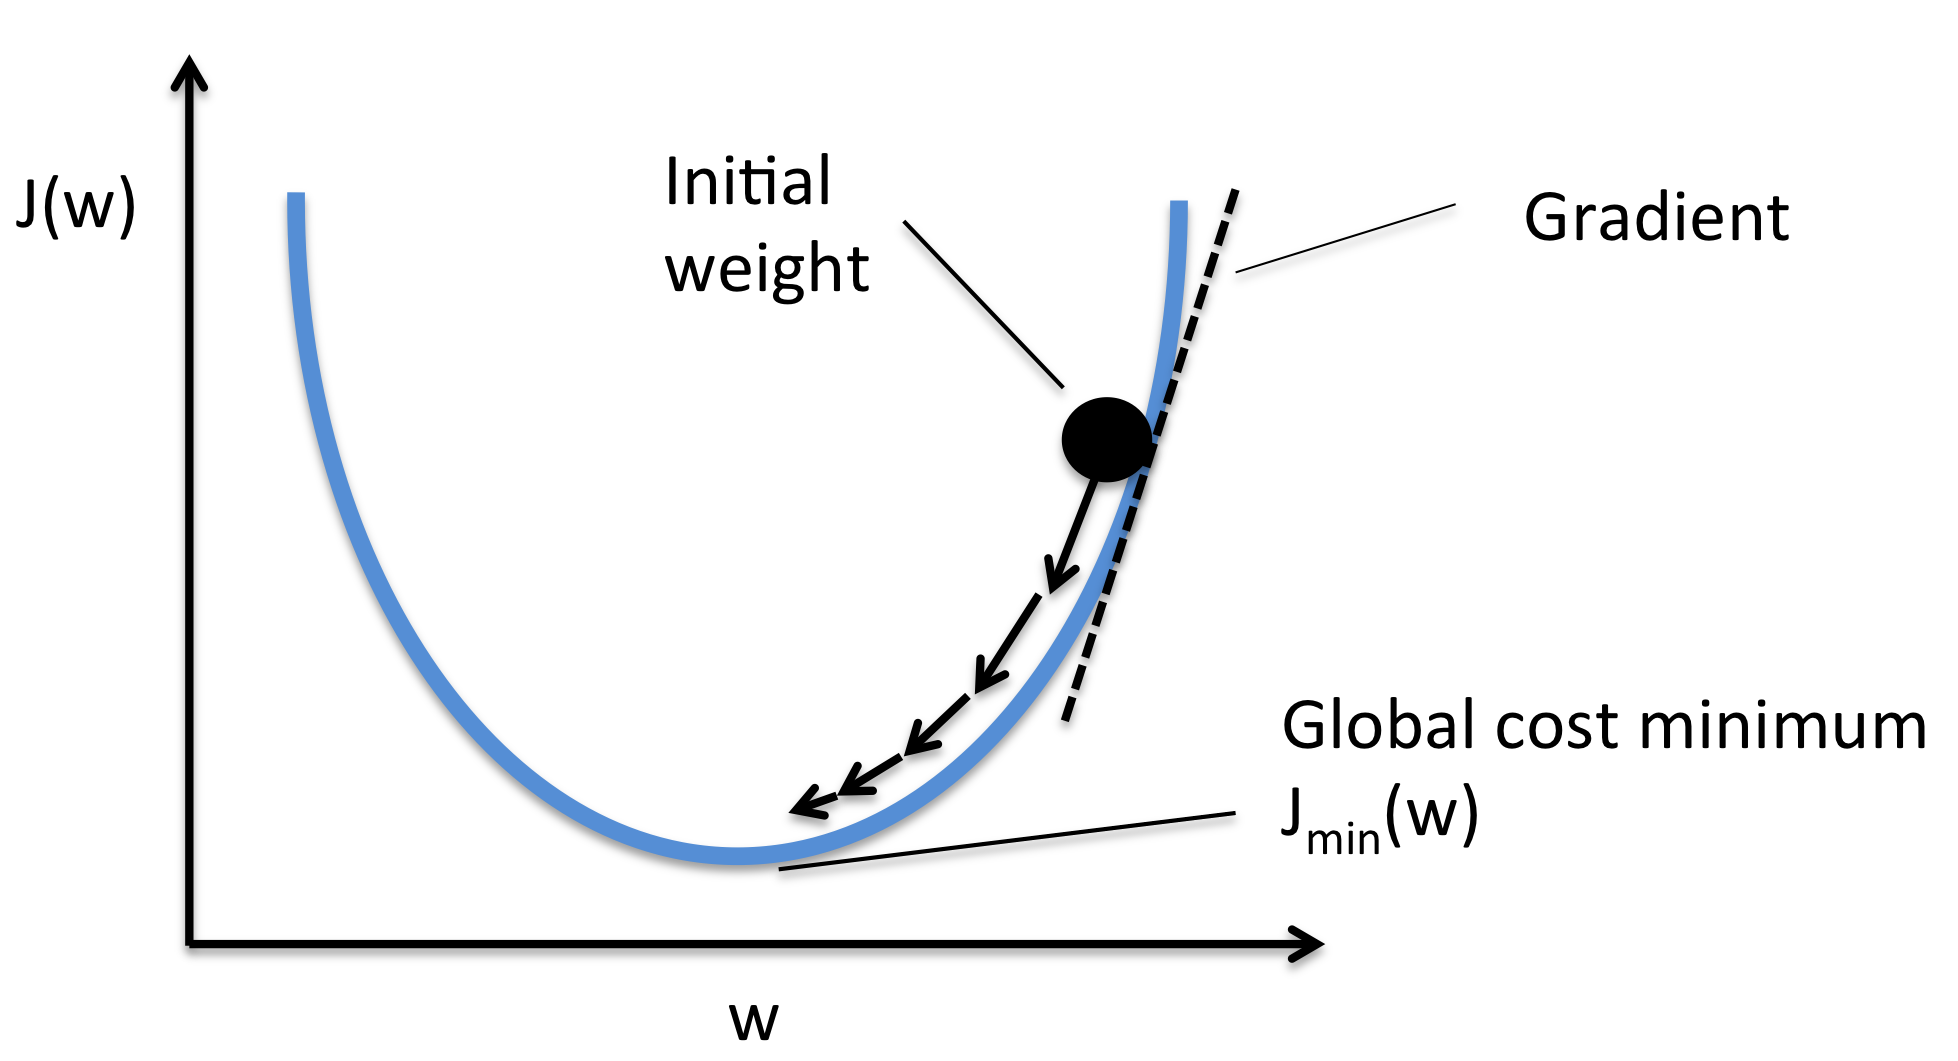

In [35]:
Image('https://machinelearningnotepad.files.wordpress.com/2018/04/yk1mk.png', width=500)

In [57]:
from sklearn.linear_model import SGDClassifier

In [58]:
sgd = SGDClassifier(random_state=0) # 숫자는 아무거나 넣어도 상관없음

In [59]:
sgd.fit(x_train, y_train) # 학습하기

SGDClassifier(random_state=0)

In [61]:
prediction = sgd.predict(x_valid) # 예측하기

In [62]:
(prediction == y_valid).mean() # 얼마만큼 맞출 수 있는지 확인하기

0.5263157894736842

### 4-1. 하이퍼 파라미터 튜닝

* 각 알고리즘 별 하이퍼 파라미터의 종류는 매우 다양함
* 문서를 보고 적절한 가설을 세운 후 적용하여 검증
* 하이퍼 파라미터는 자동으로 조절하는 기능도 있음

In [53]:
sgd = SGDClassifier(penalty='elasticnet', random_state=0, n_jobs=-1, l1_ratio=0.2) # n_jobs=-1 : cpu를 전부 사용

In [54]:
sgd.fit(x_train, y_train)

SGDClassifier(l1_ratio=0.2, n_jobs=-1, penalty='elasticnet', random_state=0)

In [55]:
prediction = sgd.predict(x_valid)

In [56]:
(prediction == y_valid).mean()

0.6842105263157895

# 5. KNeighbersClassifier

* 최근접 이웃 알고리즘


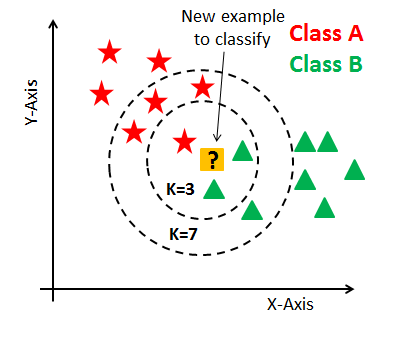

In [63]:
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knc = KNeighborsClassifier() # 기본값은 n_neighbors=5이다.

In [82]:
knc = KNeighborsClassifier(n_neighbors=12)

In [83]:
knc.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [84]:
knc_pred = knc.predict(x_valid)

In [85]:
(knc_pred == y_valid).mean()

0.9736842105263158

# 6. 서포트 벡터 머신(SVC)

* 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만듬
* 경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘
* LogisticRegression과 같이 이진 분류만 가능(2개의 클래스 판별만 가능)
* OvsR 전략을 사용
* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

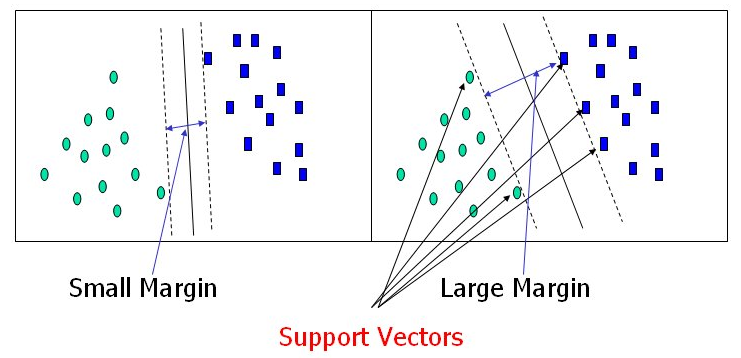

In [70]:
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

In [71]:
from sklearn.svm import SVC

In [72]:
svc = SVC(random_state=0)
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_valid)

In [73]:
svc

SVC(random_state=0)

In [74]:
(svc_pred == y_valid).mean()

1.0

In [75]:
svc_pred[:5]

array([2, 2, 2, 1, 2])

In [76]:
svc.decision_function(x_valid)[:5] # 각 클래스별 확률값을 return

array([[-0.23516579,  1.10819394,  2.21898193],
       [-0.22697302,  1.07447811,  2.2162214 ],
       [-0.2306847 ,  0.84871064,  2.2516016 ],
       [-0.22470345,  2.20954311,  1.09104936],
       [-0.2180672 ,  0.84150956,  2.24557551]])

# 7. 의사 결정 나무(Decision Tree)

* 스무고개처럼 나무 가지치기를 통해 소그룹으로 나누어 판별하는 것
* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier)

In [80]:
Image('DecisionTree.png', width=500)

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>